In [1]:
from numpy import array, matmul, sqrt, abs
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Operator
from qiskit import QuantumCircuit

In [2]:
# Initial Bra and kets
ket0 = array([[1, 0]]).T
ket1 = array([[0, 1]]).T
bra0 = array([[1, 0]])
bra1 = array([[0, 1]])
ketp = (1/sqrt(2))*ket0 + (1/sqrt(2))*ket1
brap = ketp.T
ketm = (1/sqrt(2))*ket0 - (1/sqrt(2))*ket1
bram = ketm.T
ket_psi = ((1 + 2j)/3)*ket0 - (2/3)*ket1
bra_psi = ket_psi.conj().T

In [3]:
# Deterministic Operations
m1 = array([[1, 1], [0, 0]])
m2 = array([[1, 0], [0, 1]])
m3 = array([[0, 1, ], [1, 0]])
m4 = array([[0, 0], [1, 1]])

In [7]:
# Using qiskit's statevectors
u = Statevector([1/sqrt(2), 1/sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

In [10]:
#Display State Vectors
display(u.draw("latex"))


<IPython.core.display.Latex object>

In [11]:
display(u.is_valid())

True

In [38]:
#Simulate Measurement on vector v
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
display(v.draw("latex"))
display(v.measure()[0])
prob_v_0 = abs(matmul(bra0, v))**2
prob_v_1 = abs(matmul(bra1, v))**2
display(prob_v_0)
display(prob_v_1)
display(prob_v_0 + prob_v_1)

<IPython.core.display.Latex object>

'0'

array([0.55555556])

array([0.44444444])

array([1.])

{'0': 535, '1': 465}

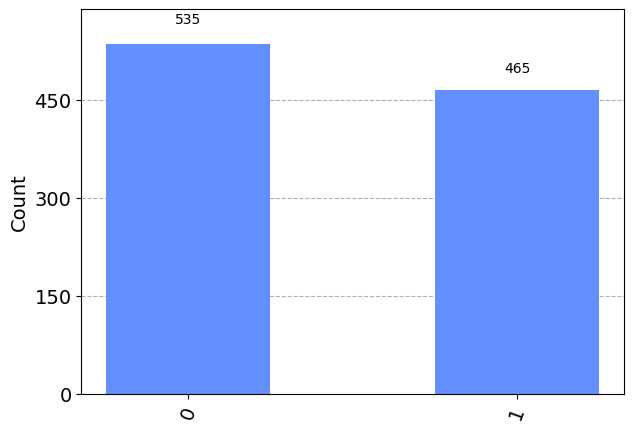

In [42]:
# Can sample measurements for n counts
data = v.sample_counts(1000)
display(data)
plot_histogram(data)

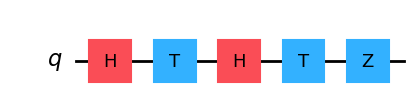

In [47]:
# Look ahead to circuits
circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)
circuit.draw("mpl")

In [50]:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
prob_v_0 = abs(matmul(bra0, v))**2
prob_v_1 = abs(matmul(bra1, v))**2
display(prob_v_0)
display(prob_v_1)
v.draw("latex")

array([0.85355339])

array([0.14644661])

<IPython.core.display.Latex object>

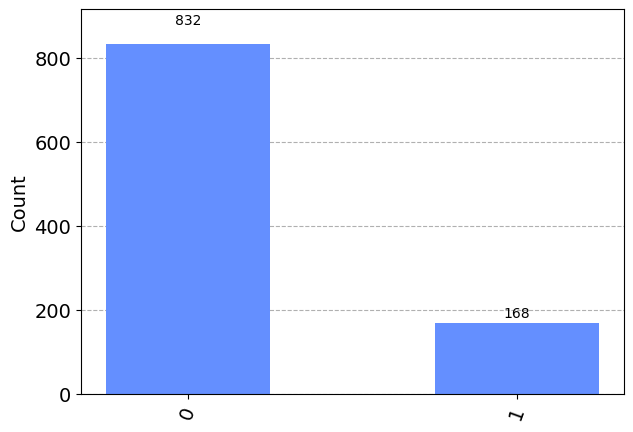

In [51]:
data = v.sample_counts(1000)
plot_histogram(data)